In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

## 1. 基本概率论


In [2]:
fair_probs = torch.ones([6]) / 6    # tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])
counts = multinomial.Multinomial(1000,fair_probs).sample()   # 抽样 1000 次，每次取 fair_probs 中的一个元素，第[i]个元素被取到的概率是 fair_probs[i]
counts / 1000

tensor([0.1660, 0.1750, 0.1820, 0.1600, 0.1830, 0.1340])

查看这些概率如何随着时间的推移收敛到真实概率

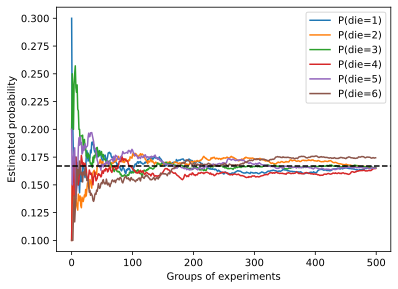

In [5]:
# smaple((500,)) 表示做 500 组实验,每组对 fair_probs 完成 10 次抽样
counts = multinomial.Multinomial(10,fair_probs).sample((500,))
# counts.sum(axis=0)  # 统计 500 * 10 次抽样中，每个元素各被抽取多少次
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

结果空间：所有可能结果的总集
随机变量：就只是一个变量，表示某个事件。如「摇骰子出现≤3点」可表示为P(1 ≤ X ≤ 3).通常会涉及到**联合发生的多随机变量问题**，如相机的焦距、ISO、画幅、像素等。

# 2. 处理多个随机变量
    1. 联合概率可以回答：P(A = a , B = b):即 A = a 和 B = b 同时满足的概率是多少？
    同时必然有 P(A = a , B = b) <= P(A = a)

    2. 条件概率可以回答:P(A = a|B = b):B = b 发生后 A = a 发生的概率

    3. 贝叶斯


SyntaxError: invalid syntax (3225484625.py, line 1)

## 3. 期望和方差